Muyuan He Tutorial of how a neural network performs a computer vision task of my choice (image classification)

Step 1: Setup, like in class tutorial.

In [19]:
import itertools
import os

import matplotlib.pylab as plt
import numpy as np

import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras

from google.colab import drive
drive.mount('/content/gdrive')

print("TF version:", tf.__version__)
print("Hub version:", hub.__version__)
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
TF version: 2.12.0
Hub version: 0.14.0
GPU is available


Here I will use the efficientnetv2-s-21k model. I choose this model because the example model used this, and it's also image classification, for flowers.
I will transfer this model for dog breed recognization, since I love dogs!

> Indented block



In [21]:
model_name = "efficientnetv2-s-21k" # @param ['efficientnetv2-s', 'efficientnetv2-m', 'efficientnetv2-l', 'efficientnetv2-s-21k', 'efficientnetv2-m-21k', 'efficientnetv2-l-21k', 'efficientnetv2-xl-21k', 'efficientnetv2-b0-21k', 'efficientnetv2-b1-21k', 'efficientnetv2-b2-21k', 'efficientnetv2-b3-21k', 'efficientnetv2-s-21k-ft1k', 'efficientnetv2-m-21k-ft1k', 'efficientnetv2-l-21k-ft1k', 'efficientnetv2-xl-21k-ft1k', 'efficientnetv2-b0-21k-ft1k', 'efficientnetv2-b1-21k-ft1k', 'efficientnetv2-b2-21k-ft1k', 'efficientnetv2-b3-21k-ft1k', 'efficientnetv2-b0', 'efficientnetv2-b1', 'efficientnetv2-b2', 'efficientnetv2-b3', 'efficientnet_b0', 'efficientnet_b1', 'efficientnet_b2', 'efficientnet_b3', 'efficientnet_b4', 'efficientnet_b5', 'efficientnet_b6', 'efficientnet_b7', 'bit_s-r50x1', 'inception_v3', 'inception_resnet_v2', 'resnet_v1_50', 'resnet_v1_101', 'resnet_v1_152', 'resnet_v2_50', 'resnet_v2_101', 'resnet_v2_152', 'nasnet_large', 'nasnet_mobile', 'pnasnet_large', 'mobilenet_v2_100_224', 'mobilenet_v2_130_224', 'mobilenet_v2_140_224', 'mobilenet_v3_small_100_224', 'mobilenet_v3_small_075_224', 'mobilenet_v3_large_100_224', 'mobilenet_v3_large_075_224']

model_handle_map = {
  "efficientnetv2-s": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_s/feature_vector/2",
  "efficientnetv2-m": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_m/feature_vector/2",
  "efficientnetv2-l": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_l/feature_vector/2",
  "efficientnetv2-s-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_s/feature_vector/2",
  "efficientnetv2-m-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_m/feature_vector/2",
  "efficientnetv2-l-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_l/feature_vector/2",
  "efficientnetv2-xl-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_xl/feature_vector/2",
  "efficientnetv2-b0-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_b0/feature_vector/2",
  "efficientnetv2-b1-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_b1/feature_vector/2",
  "efficientnetv2-b2-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_b2/feature_vector/2",
  "efficientnetv2-b3-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_b3/feature_vector/2",
  "efficientnetv2-s-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_s/feature_vector/2",
  "efficientnetv2-m-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_m/feature_vector/2",
  "efficientnetv2-l-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_l/feature_vector/2",
  "efficientnetv2-xl-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_xl/feature_vector/2",
  "efficientnetv2-b0-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_b0/feature_vector/2",
  "efficientnetv2-b1-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_b1/feature_vector/2",
  "efficientnetv2-b2-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_b2/feature_vector/2",
  "efficientnetv2-b3-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_b3/feature_vector/2",
  "efficientnetv2-b0": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b0/feature_vector/2",
  "efficientnetv2-b1": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b1/feature_vector/2",
  "efficientnetv2-b2": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b2/feature_vector/2",
  "efficientnetv2-b3": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b3/feature_vector/2",
  "efficientnet_b0": "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1",
  "efficientnet_b1": "https://tfhub.dev/tensorflow/efficientnet/b1/feature-vector/1",
  "efficientnet_b2": "https://tfhub.dev/tensorflow/efficientnet/b2/feature-vector/1",
  "efficientnet_b3": "https://tfhub.dev/tensorflow/efficientnet/b3/feature-vector/1",
  "efficientnet_b4": "https://tfhub.dev/tensorflow/efficientnet/b4/feature-vector/1",
  "efficientnet_b5": "https://tfhub.dev/tensorflow/efficientnet/b5/feature-vector/1",
  "efficientnet_b6": "https://tfhub.dev/tensorflow/efficientnet/b6/feature-vector/1",
  "efficientnet_b7": "https://tfhub.dev/tensorflow/efficientnet/b7/feature-vector/1",
  "bit_s-r50x1": "https://tfhub.dev/google/bit/s-r50x1/1",
  "inception_v3": "https://tfhub.dev/google/imagenet/inception_v3/feature-vector/4",
  "inception_resnet_v2": "https://tfhub.dev/google/imagenet/inception_resnet_v2/feature-vector/4",
  "resnet_v1_50": "https://tfhub.dev/google/imagenet/resnet_v1_50/feature-vector/4",
  "resnet_v1_101": "https://tfhub.dev/google/imagenet/resnet_v1_101/feature-vector/4",
  "resnet_v1_152": "https://tfhub.dev/google/imagenet/resnet_v1_152/feature-vector/4",
  "resnet_v2_50": "https://tfhub.dev/google/imagenet/resnet_v2_50/feature-vector/4",
  "resnet_v2_101": "https://tfhub.dev/google/imagenet/resnet_v2_101/feature-vector/4",
  "resnet_v2_152": "https://tfhub.dev/google/imagenet/resnet_v2_152/feature-vector/4",
  "nasnet_large": "https://tfhub.dev/google/imagenet/nasnet_large/feature_vector/4",
  "nasnet_mobile": "https://tfhub.dev/google/imagenet/nasnet_mobile/feature_vector/4",
  "pnasnet_large": "https://tfhub.dev/google/imagenet/pnasnet_large/feature_vector/4",
  "mobilenet_v2_100_224": "https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/4",
  "mobilenet_v2_130_224": "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/feature_vector/4",
  "mobilenet_v2_140_224": "https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/feature_vector/4",
  "mobilenet_v3_small_100_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_small_100_224/feature_vector/5",
  "mobilenet_v3_small_075_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_small_075_224/feature_vector/5",
  "mobilenet_v3_large_100_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_large_100_224/feature_vector/5",
  "mobilenet_v3_large_075_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_large_075_224/feature_vector/5",
}

model_image_size_map = {
  "efficientnetv2-s": 384,
  "efficientnetv2-m": 480,
  "efficientnetv2-l": 480,
  "efficientnetv2-b0": 224,
  "efficientnetv2-b1": 240,
  "efficientnetv2-b2": 260,
  "efficientnetv2-b3": 300,
  "efficientnetv2-s-21k": 384,
  "efficientnetv2-m-21k": 480,
  "efficientnetv2-l-21k": 480,
  "efficientnetv2-xl-21k": 512,
  "efficientnetv2-b0-21k": 224,
  "efficientnetv2-b1-21k": 240,
  "efficientnetv2-b2-21k": 260,
  "efficientnetv2-b3-21k": 300,
  "efficientnetv2-s-21k-ft1k": 384,
  "efficientnetv2-m-21k-ft1k": 480,
  "efficientnetv2-l-21k-ft1k": 480,
  "efficientnetv2-xl-21k-ft1k": 512,
  "efficientnetv2-b0-21k-ft1k": 224,
  "efficientnetv2-b1-21k-ft1k": 240,
  "efficientnetv2-b2-21k-ft1k": 260,
  "efficientnetv2-b3-21k-ft1k": 300,
  "efficientnet_b0": 224,
  "efficientnet_b1": 240,
  "efficientnet_b2": 260,
  "efficientnet_b3": 300,
  "efficientnet_b4": 380,
  "efficientnet_b5": 456,
  "efficientnet_b6": 528,
  "efficientnet_b7": 600,
  "inception_v3": 299,
  "inception_resnet_v2": 299,
  "nasnet_large": 331,
  "pnasnet_large": 331,
}

model_handle = model_handle_map.get(model_name)
pixels = model_image_size_map.get(model_name, 224)

print(f"Selected model: {model_name} : {model_handle}")

IMAGE_SIZE = (pixels, pixels)
print(f"Input size {IMAGE_SIZE}")

BATCH_SIZE = 16

Selected model: efficientnetv2-s-21k : https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_s/feature_vector/2
Input size (384, 384)


Setting up dataset: Dog dataset, downloaded form Keras: https://www.kaggle.com/datasets/gpiosenka/70-dog-breedsimage-data-set
This is a rather large dataset. From inspecting it, I realized it is very well formed. It has multiple directories, including training dir, validation dir and test dir. Under each directory are directories of different dog breeds, and under each breed name is pictures of that breed. It is actually quite difficult to differentiate different breeds in real life for humans, so I think it's a quite challenging differentiation task.

In [22]:
train_dir = '/content/gdrive/MyDrive/70dogbreeds/train'
valid_dir = '/content/gdrive/MyDrive/70dogbreeds/valid'
test_dir = '/content/gdrive/MyDrive/70dogbreeds/test'

#train_size = train_dir.cardinality().numpy()


img_height, img_width = 384, 384
batch_size = 1

In [23]:
def build_dataset(dir_path, image_size, batch_size):
    return tf.keras.preprocessing.image_dataset_from_directory(
        dir_path,
        label_mode="categorical",
        # Seed needs to provided when using validation_split and shuffle = True.
        # A fixed seed is used so that the validation set is stable across runs.
        seed=123,
        image_size=image_size,
        batch_size=batch_size)
normalization_layer = tf.keras.layers.Rescaling(1./255)
print(f"Loading train dataset ...")
train_ds = build_dataset(train_dir, (img_height, img_width), batch_size)
class_names = train_ds.class_names
num_classes = len(class_names)
train_ds = train_ds.map(lambda images, labels: (normalization_layer(images), labels))

print(f"Loading validation dataset ...")
valid_ds = build_dataset(valid_dir, (img_height, img_width), batch_size)
valid_ds = valid_ds.map(lambda images, labels: (normalization_layer(images), labels))

print(f"Loading test dataset ...")
test_ds = build_dataset(test_dir, (img_height, img_width), batch_size)
test_ds = test_ds.map(lambda images, labels: (normalization_layer(images), labels))

Loading train dataset ...
Found 7946 files belonging to 70 classes.
Loading validation dataset ...
Found 700 files belonging to 70 classes.
Loading test dataset ...
Found 700 files belonging to 70 classes.


Step 2: Defining the model
    transfer learning is used to keep things simple. The implementation line is
    hub.KerasLayer(...)

In [24]:
do_fine_tuning = False

In [27]:
print("Building model with", model_handle)
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=IMAGE_SIZE + (3,)), # here 384x384x3colors(RGB)
    hub.KerasLayer(model_handle, trainable=do_fine_tuning), #do_fine_tuning is false
    tf.keras.layers.Dropout(rate=0.2), # prevent overfitting
    tf.keras.layers.Dense(len(class_names),
                          kernel_regularizer=tf.keras.regularizers.l2(0.0001))
])
model.build((None,)+IMAGE_SIZE+(3,)) # again, RGB
model.compile(
  optimizer=tf.keras.optimizers.SGD(learning_rate=0.005, momentum=0.9),  # Here the Optimizer is SGD, I used this because the original example used it, and I don't understand it well so if it's not broken, not changing it.
  loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True, label_smoothing=0.1), # Here I used CategoricalCrosentropy loss function because it is multi class
  metrics=['accuracy']) # Here use accuracy because data sample is rather balanced
model.summary()

Building model with https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_s/feature_vector/2
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_3 (KerasLayer)  (None, 1280)              20331360  
                                                                 
 dropout_3 (Dropout)         (None, 1280)              0         
                                                                 
 dense_3 (Dense)             (None, 70)                89670     
                                                                 
Total params: 20,421,030
Trainable params: 89,670
Non-trainable params: 20,331,360
_________________________________________________________________


In [32]:
BATCH_SIZE =64
train_size = train_ds.cardinality().numpy()
valid_size = valid_ds.cardinality().numpy()

steps_per_epoch = train_size // BATCH_SIZE
validation_steps = valid_size // BATCH_SIZE
hist = model.fit(
    train_ds,
    epochs=5, steps_per_epoch=steps_per_epoch,
    validation_data=valid_ds,  # Use the already defined valid_ds
    validation_steps=validation_steps).history


Epoch 1/5
124/124 [==============================] - 3s 23ms/step - loss: 13.5411 - accuracy: 0.5645 - val_loss: 25.9673 - val_accuracy: 0.5000
Epoch 2/5
124/124 [==============================] - 3s 22ms/step - loss: 11.9617 - accuracy: 0.6855 - val_loss: 14.0174 - val_accuracy: 0.4000
Epoch 3/5
124/124 [==============================] - 3s 22ms/step - loss: 11.9657 - accuracy: 0.6532 - val_loss: 22.4607 - val_accuracy: 0.5000
Epoch 4/5
124/124 [==============================] - 4s 34ms/step - loss: 14.3291 - accuracy: 0.6210 - val_loss: 26.0910 - val_accuracy: 0.4000
Epoch 5/5
124/124 [==============================] - 3s 22ms/step - loss: 14.0510 - accuracy: 0.6613 - val_loss: 18.9119 - val_accuracy: 0.4000


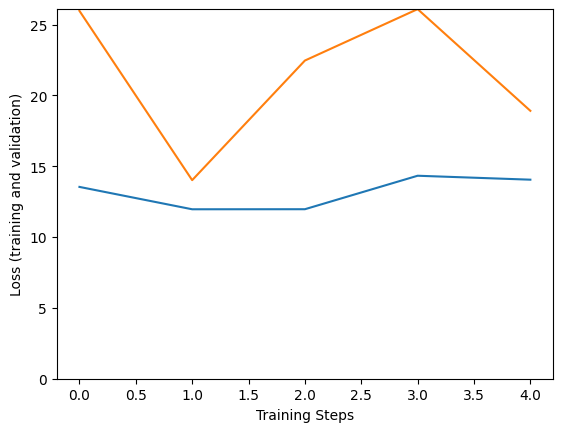

In [39]:
plt.figure()
plt.ylabel("Loss (training and validation)")
plt.xlabel("Training Steps")
plt.ylim([0, max(max(hist['loss']), max(hist['val_loss']))])  # Set the limit to the max loss
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])


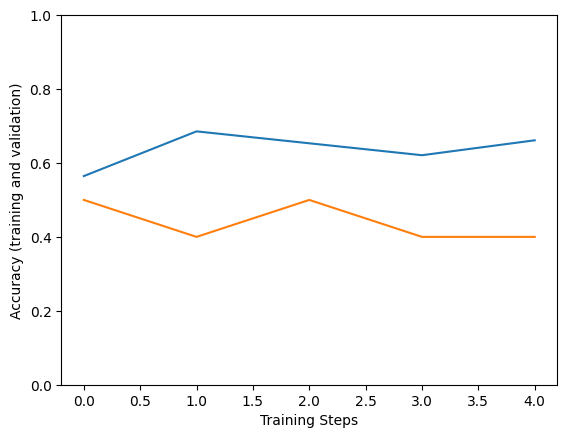

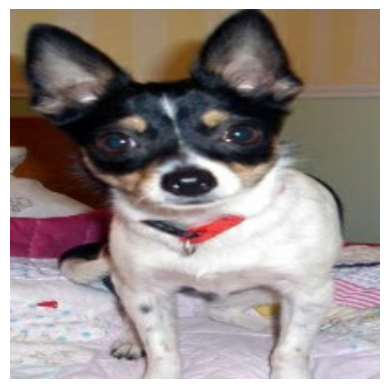

1/1 [==============================] - 0s 51ms/step
True label: Chihuahua
Predicted label: Greyhound


In [41]:
plt.figure()
plt.ylabel("Accuracy (training and validation)")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(hist["accuracy"])
plt.plot(hist["val_accuracy"])
plt.show()



x, y = next(iter(valid_ds))
image = x[0, :, :, :]
true_index = np.argmax(y[0])
plt.imshow(image)
plt.axis('off')
plt.show()

# Expand the validation image to (1, 384, 384, 3) before predicting the label
prediction_scores = model.predict(np.expand_dims(image, axis=0))
predicted_index = np.argmax(prediction_scores)
print("True label: " + class_names[true_index])
print("Predicted label: " + class_names[predicted_index])

Finally save the trained model

In [42]:
saved_model_path = f"/tmp/saved_flowers_model_{model_name}"
tf.saved_model.save(model, saved_model_path)

The intended use for this model is to determine the breed of a dog once provided the photo. However, the model will be limited by the dataset we provide. For example, if all of the Border Collies in the dataset are black and white colored, once provided a blonde border collie, it will not recognize it, eventhough based on the pattern we can easily identify a border collie. In that sense, the model can be under fitted. In general, a dog breed can have a lot of color variations. I think a better way to identify breeds might be combining RGB color with black/white color together to have better results.

Also, the model uses transfer learning, and is most likely trained to do another task. Therefore the patterns might not be the same. Especially looking at flower vs. dogs lol.

Potential changes are spending more time on fine tuning the batch size, using more complicated models.